In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
years = [year for year in range(2011, 2021)]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93,90]

movie_dict = {'years': years, 'durations': durations}

movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [3]:
durations_df = pd.DataFrame(movie_dict)
display(durations_df)

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


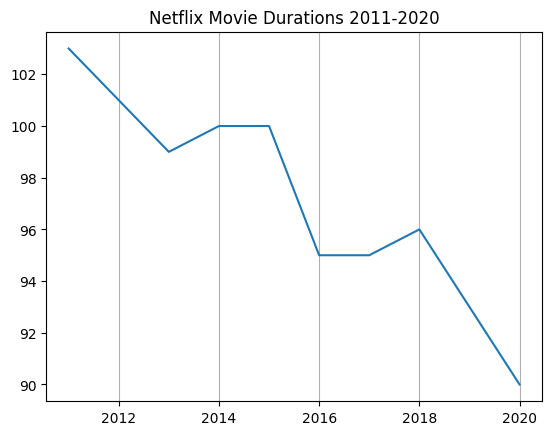

In [4]:

plt.plot(durations_df['years'], durations_df['durations'])


plt.title("Netflix Movie Durations 2011-2020")

plt.grid(axis='x')
plt.show()

In [5]:
from google.colab import files
import pandas as pd

# Carregue o arquivo CSV usando a função files.upload()
uploaded = files.upload()

# Obtenha o nome do arquivo carregado
file_name = list(uploaded.keys())[0]

# Carregue o CSV no DataFrame do Pandas
df = pd.read_csv(file_name)

# Exiba as primeiras linhas do DataFrame para verificar se foi carregado corretamente
df.head()


Saving netflix_titles.csv to netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
df['type'].value_counts() # Contar os valores únicos em uma coluna, por exemplo, a coluna 'type'

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [14]:
movies_df = df[df['type'] == 'Movie']

In [15]:
tv_shows_df = df[df['type'] == 'TV Show']


In [16]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [17]:
# Contar os valores únicos na coluna 'type'
df['type'].value_counts()


Movie      6131
TV Show    2676
Name: type, dtype: int64

In [18]:
# Contar os títulos por diretor e exibir os 10 principais
top_directors = df['director'].value_counts().head(10)
print(top_directors)


Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64


In [19]:
# Converter a coluna 'duration' para minutos e calcular a média
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
avg_duration = df.groupby('type')['duration'].mean()
print(avg_duration)


type
Movie      99.577187
TV Show     1.764948
Name: duration, dtype: float64


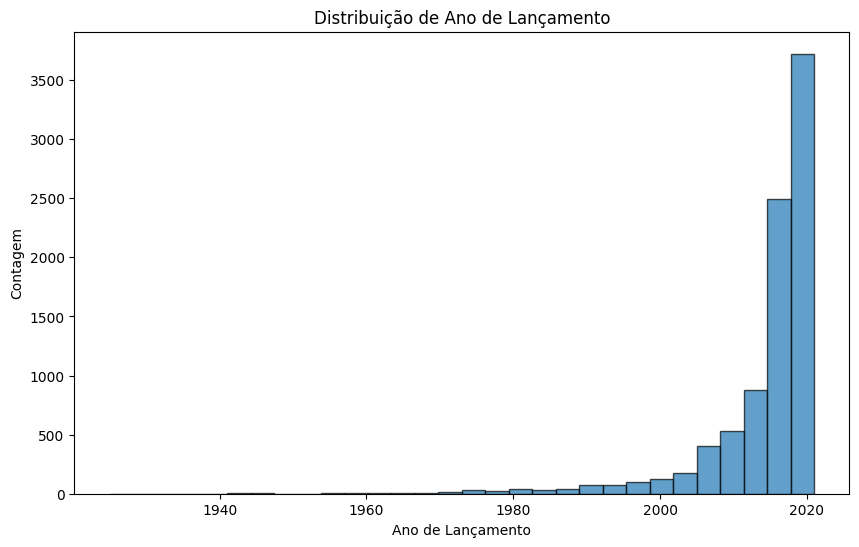

In [20]:
# Plotar um histograma da distribuição de anos de lançamento
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribuição de Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Contagem')
plt.show()


In [21]:
# Contar os títulos por gênero e exibir os 10 principais
top_genres = df['listed_in'].value_counts().head(10)
print(top_genres)


Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64


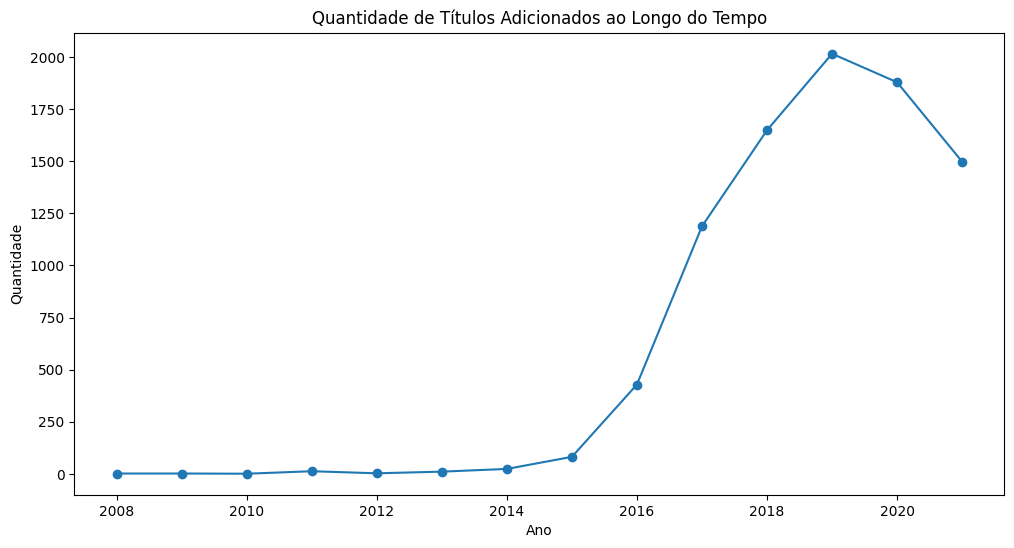

In [22]:
# Converter a coluna 'date_added' para o formato datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Criar um gráfico de linha mostrando a quantidade de títulos adicionados ao longo do tempo
plt.figure(figsize=(12, 6))
df['date_added'].dt.year.value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Quantidade de Títulos Adicionados ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()


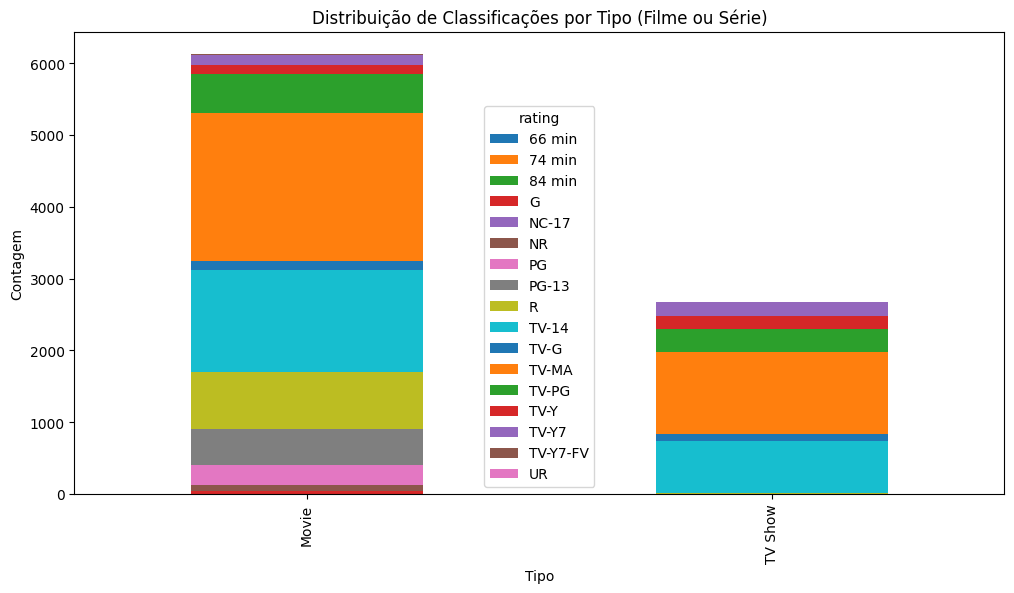

In [23]:
# Criar um gráfico de barras empilhadas mostrando a distribuição de classificações por tipo
rating_by_type = df.groupby(['type', 'rating']).size().unstack()
rating_by_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribuição de Classificações por Tipo (Filme ou Série)')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.show()


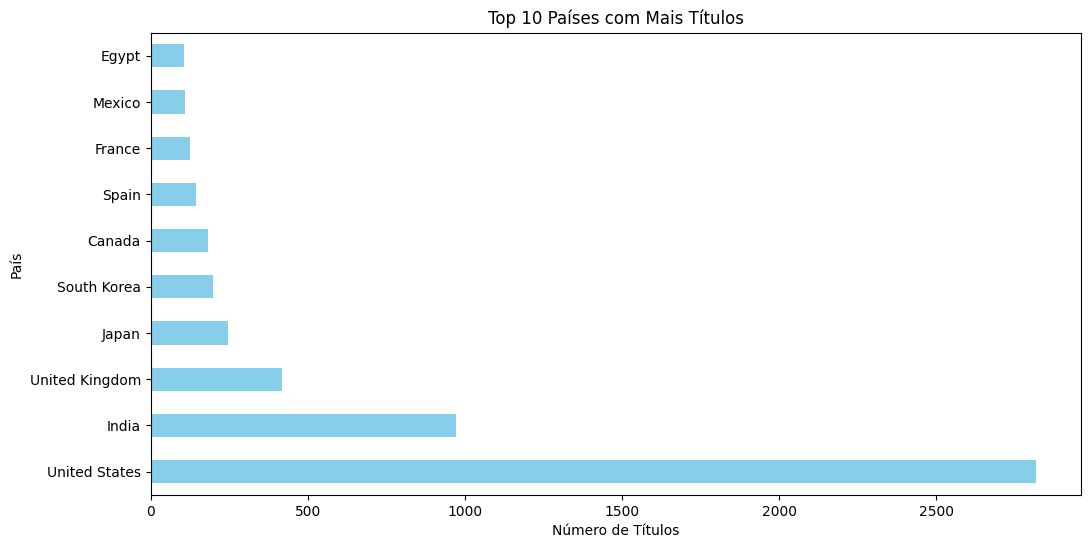

In [24]:
# Criar um gráfico de barras horizontais mostrando os 10 principais países com mais títulos
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Países com Mais Títulos')
plt.xlabel('Número de Títulos')
plt.ylabel('País')
plt.show()


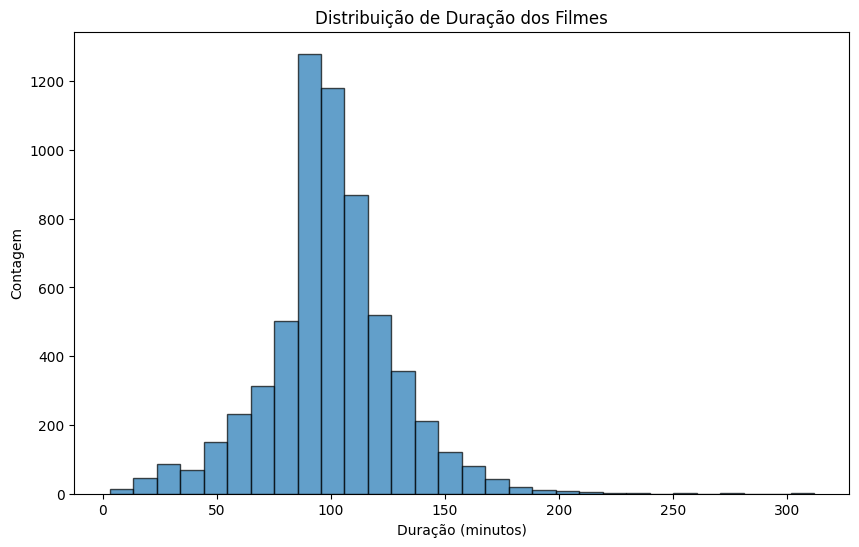

In [25]:
# Criar um histograma para a distribuição de duração dos filmes
movies_duration = df[df['type'] == 'Movie']
plt.figure(figsize=(10, 6))
plt.hist(movies_duration['duration'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribuição de Duração dos Filmes')
plt.xlabel('Duração (minutos)')
plt.ylabel('Contagem')
plt.show()


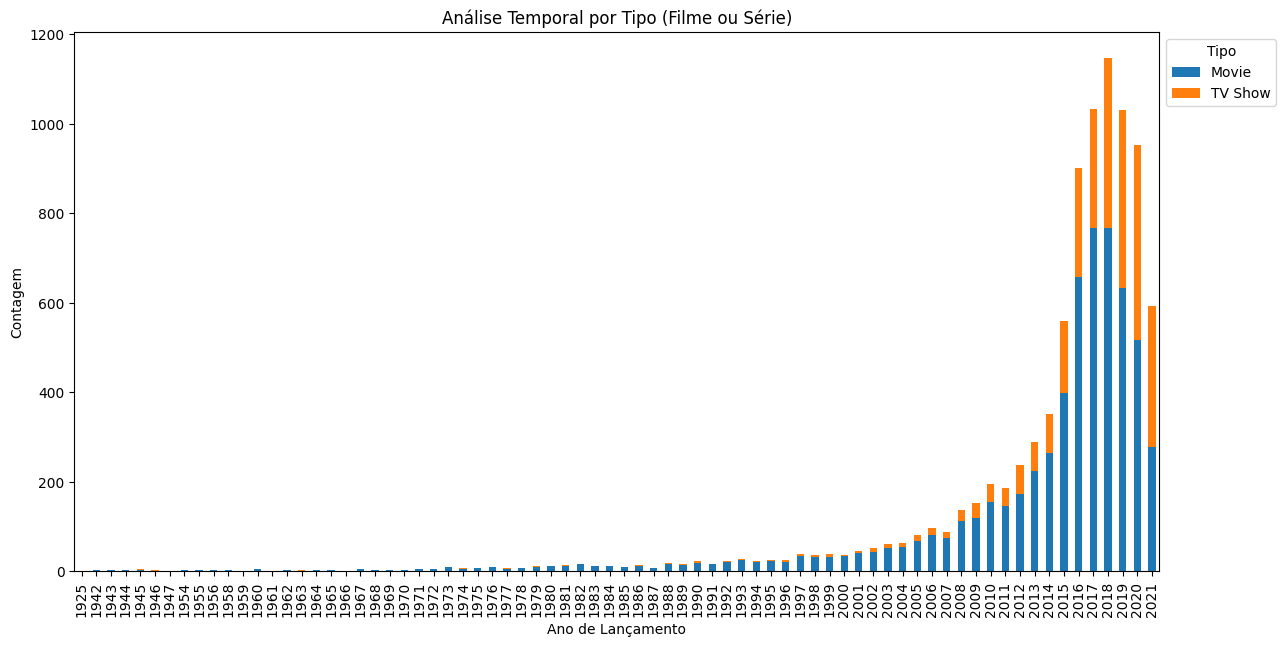

In [26]:
# Criar um gráfico de barras empilhadas mostrando a quantidade de filmes e séries lançados ao longo do tempo
temporal_analysis = df.groupby(['release_year', 'type']).size().unstack()
temporal_analysis.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Análise Temporal por Tipo (Filme ou Série)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Contagem')
plt.legend(title='Tipo', bbox_to_anchor=(1, 1))
plt.show()
